In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!python3 -m pip install konlpy

In [3]:
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.16).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
python3-dev is already the newest version (3.6.7-1~18.04).
openjdk-8-jdk is already the newest version (8u312-b07-0ubuntu1~18.04).
python3-pip is already the newest version (9.0.1-2.3~ubuntu1.18.04.5).
0 upgraded, 0 newly installed, 0 to remove and 96 not upgraded.


In [4]:
!sudo apt-get install curl git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.16).
git is already the newest version (1:2.17.1-1ubuntu0.9).
0 upgraded, 0 newly installed, 0 to remove and 96 not upgraded.


In [5]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [6]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'cmex10',
 'STIXSizeFiveSym',
 'DejaVu Sans Display',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmss10',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'STIXGeneral',
 'cmb10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmmi10',
 'cmtt10',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmr10',
 'DejaVu Sans Mono',
 'cmsy10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'Liberation Sans',
 'DejaVu Serif',
 'Liberation Mono',
 'DejaVu Math TeX Gyre',
 'DejaVu Sans',
 'Liberation Serif',
 'DejaVu Serif',
 'DejaVu Sans',
 'Liberation Sans',
 'Liberation Sans',
 'NanumSquareRound',
 'NanumSquareRound',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'Humor Sans',
 'Liberation Sans',
 'NanumBarunGothic'

In [7]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

In [8]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정

plt.rc('font', family='NanumBarunGothic') 

In [9]:
from tensorflow import keras
import konlpy
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# 1. 데이터 불러오기

## ⓐ 리눅스 사용 (wget, tar)

- wget 웹주소 -P 로컬폴더
- wget -P 로컬폴더 웹주소
- tar xvzf /경로/압축파일.tar.gz -C /원하는위치

In [10]:
# !wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz -P /content/sample_data

In [11]:
# !wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

In [12]:
# !tar -zxvf korean-english-park.train.tar.gz -C /content/sample_data

In [13]:
# !tar -zxvf korean-english-park.train.tar.gz

## ⓑ 파이썬 내장 함수인 urllib을 사용하기

.tar.gz 파일은 TAR 패키징과 GNU zip(gzip) 압축의 조합으로 만들어집니다. 이러한 파일은 일반적으로 Unix/Linux 기반 시스템에서 패키지 또는 설치 프로그램으로 사용됩니다. 이 파일을 읽거나 추출하려면 먼저 이 파일의 압축을 풀고 TAR 유틸리티로 확장해야 합니다. 이 파일에는 .tar와 .gz 파일이 모두 포함되어 있기 때문입니다.

파이썬을 사용하여 ".tar.gz" 파일을 추출하거나 압축을 풀려면 파이썬에서 tarfile 모듈을 사용해야 합니다. 이 모듈은 .gz, .bz 압축 방법을 포함한 .tar 파일을 읽고 쓸 수 있습니다.

### urllib.request
- urllib.request는 데이터를 전송할 때 인코딩을 해서 바이너리 형태로 전송한다.
- 데이터의 상태에 따라서 get과 post 함수를 구분해서 전송한다.

- [requests와 urllib.request 비교](https://incomeplus.tistory.com/254)

### url에서 파일 이름 추출할 때 사용하는 코드

- filename = URL.split('/')[-1]
- img_name = os.path.basename(URL)

URL ex: "https://github.com/jungyeul/korean-parallel-corpora/tree/master/korean-english-news-v1/korean-english-park.train.tar.gz"

In [14]:
# import tarfile
# import urllib
# from urllib import request

In [15]:
# URL = "https://github.com/jungyeul/korean-parallel-corpora/tree/master/korean-english-news-v1/korean-english-park.train.tar.gz"
# download_filename = os.path.basename(URL)

In [16]:
# print(download_filename)

In [17]:
# urllib.request.urlretrieve(URL, download_filename)

file could not be opened successfully 문제 발생, 원본파일이 변하기 때문으로 예상함

In [18]:
# DOWNLOAD_ROOT = "https://github.com/jungyeul/korean-parallel-corpora/tree/master/korean-english-news-v1/"
# KO_EN_TRAIN_URL = DOWNLOAD_ROOT + "korean-english-park.train.tar.gz"
# NAME = "korean-english-park.train"+".tar.gz"
# KO = "/content/drive/MyDrive/Going_Deeper_NLP_BS/Going_Deeper_NLP_BS_sub"

# KO_EN_PATH = os.path.join(KO,"Seq2Seq")

In [19]:
# def fetch_KO_EN_data(ko_en_train=KO_EN_TRAIN_URL, ko_en_path=KO_EN_PATH):
#   if not os.path.isdir(ko_en_path):
#     os.makedirs(ko_en_path)
#   for filename, url in ("korean-english-park.train.tar.gz",ko_en_train):
#     path = os.path.join(ko_en_path, filename)
#     if not os.path.isfile(path):
#       urllib.request.urlretrieve(url, path)

#     tar_gz_file = tarfile.open(path)
#     tar_gz_file.extractall(path=KO_EN_PATH)
#     tar_gz_file.close()

## ⓒ 케라스(Keras)의 get_file 함수

In [20]:
path_to_zip = tf.keras.utils.get_file(
'korean-english-park.train.tar.gz',
origin='https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz',
extract=True)

print(path_to_zip)
path_to_file_ko = os.path.dirname(path_to_zip)+"/korean-english-park.train.ko"
with open(path_to_file_ko, "r") as f:
  raw_kor = f.read().splitlines()

print("Korean Data Size:", len(raw_kor))
print("Example:")

for sen in raw_kor[0:100][::20]: print(">>", sen)

/root/.keras/datasets/korean-english-park.train.tar.gz
Korean Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [21]:
path_to_file_en = os.path.dirname(path_to_zip)+"/korean-english-park.train.en"
with open(path_to_file_en, "r") as f:
  raw_en = f.read().splitlines()

print("English Data Size:", len(raw_kor))
print("Example:")

for sen in raw_en[0:100][::20]: print(">>", sen)

English Data Size: 94123
Example:
>> Much of personal computing is about "can you top this?"
>> Amid mounting pressure on North Korea to abandon its nuclear weapons program Japanese and North Korean diplomats have resumed talks on normalizing diplomatic relations.
>> “Guard robots are used privately and professionally to detect intruders or fire,” Karlsson said.
>> Authorities from the Water Resources Ministry plan to begin construction next year on the controversial and hugely expensive project.
>> Researchers also have debated whether weight-training has a big impact on the heart, since it does not give the heart and lungs the kind of workout they get from aerobic activities such as brisk walking or running for at least 20 minutes.


In [22]:
data_ko_en = zip(raw_kor, raw_en)
cleaned_corpus = set(data_ko_en)
print("중복을 제거한 데이터 개수는 {}개 입니다.".format(len(cleaned_corpus)))

중복을 제거한 데이터 개수는 78968개 입니다.


### Mecap을 문자열로 만들어서 토큰화 시켜야 하는가?

In [23]:
corpus = list(cleaned_corpus)

In [24]:
corpus[1][0]

'한편 호주의 S&P/ASX 200 지수는 은행들의 실적 부진 소식이 알려지면서 0.5% 하락했다.'

In [25]:
a = ['a', 'z', 'a', 'g', 'a', 'd']
b = " ".join(a)
b

'a z a g a d'

In [26]:
mecab = Mecab()
morph = mecab.morphs(corpus[1][0])
a = [" ".join(morph)]

In [27]:
a

['한편 호주 의 S & P / ASX 200 지수 는 은행 들 의 실적 부진 소식 이 알려 지 면서 0 . 5 % 하락 했 다 .']

In [28]:
for sen in [corpus[1][0]]:
  print(sen)

한편 호주의 S&P/ASX 200 지수는 은행들의 실적 부진 소식이 알려지면서 0.5% 하락했다.


In [29]:
mecab = Mecab()
morph = [" ".join(mecab.morphs(sen)) for sen in [corpus[0][0]]]
morph

['북한 은 개성 과 신의주 간 철도 를 다시 연결 하 고 보수 하 는 것 에 대한 회담 준비 에 더 많 은 시간 이 필요 하 다고 밝혔 다 .']

In [30]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(morph)

In [31]:
tokenizer.index_word

{1: '하',
 2: '은',
 3: '에',
 4: '북한',
 5: '개성',
 6: '과',
 7: '신의주',
 8: '간',
 9: '철도',
 10: '를',
 11: '다시',
 12: '연결',
 13: '고',
 14: '보수',
 15: '는',
 16: '것',
 17: '대한',
 18: '회담',
 19: '준비',
 20: '더',
 21: '많',
 22: '시간',
 23: '이',
 24: '필요',
 25: '다고',
 26: '밝혔',
 27: '다',
 28: '.'}

In [32]:
mecab = Mecab()
morph = mecab.morphs(corpus[0][0])
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(morph)
tokenizer.index_word

{1: '하',
 2: '은',
 3: '에',
 4: '북한',
 5: '개성',
 6: '과',
 7: '신의주',
 8: '간',
 9: '철도',
 10: '를',
 11: '다시',
 12: '연결',
 13: '고',
 14: '보수',
 15: '는',
 16: '것',
 17: '대한',
 18: '회담',
 19: '준비',
 20: '더',
 21: '많',
 22: '시간',
 23: '이',
 24: '필요',
 25: '다고',
 26: '밝혔',
 27: '다',
 28: '.'}

결론: mecab을 사용한 후 문자열로 바꿔서 토큰화하는 것과 바로 토큰화하는 것은 차이가 없다. 고로, 문자열로 바꾸는 처리는 필요하지않습니다.

# 2. 데이터 전처리

정규표현식을 사용해 특수문자 제거

전처리 과정에서 문장의 시작 문자 `<start>`, 종료 문자 `<end>` 를 붙여주게 됩니다. 이 작업은 Encoder에 들어갈 입력 문장의 전처리에는 굳이 필요하지 않지만, Decoder의 입력 문장과 라벨로 사용할 출력 문장에는 꼭 필요하게 됩니다. 이전 렉처 노드에서 살펴보았듯, Decoder는 첫 입력으로 사용할 시작 토큰과 문장생성 종료를 알리는 끝 토큰이 반드시 필요하기 때문입니다.

In [33]:
corpus = list(cleaned_corpus)
mecab = Mecab()

In [34]:
corpus[0:10]

[('북한은 개성과 신의주 간 철도를 다시 연결하고 보수하는 것에 대한 회담 준비에 더 많은 시간이 필요하다고 밝혔다.',
  'North Korea said it needed more time to prepare for the talks about reconnecting and repairing railway routes between Kaesong and Shinuiju.'),
 ('한편 호주의 S&P/ASX 200 지수는 은행들의 실적 부진 소식이 알려지면서 0.5% 하락했다.',
  "Australia's key S&P/ASX 200 index eased 0.5 percent, dragged down by weakness in the major banks."),
 ('탄저병을 흡입하는 경우는 매우 드물며 전염성 병은 아니다.',
  'Anthrax inhalation is very rare, and is not contagious.'),
 ('이번 첫 여성 법무부 장관의 경질은 검찰 개혁을 포함해 정책 다수에 있어 충돌을 빚어왔던 검찰 측 및 언론에 충격으로 다가왔다.',
  '"" The sacking of the nation\'s first female justice minister came as a shock to the media and the prosecution with whom the nation\'s first female minister has had a rift over a number of policy issues including the scope of reform measures.'),
 ('네바다 경찰은 비디오에 잡힌 3세 여아 성폭행 혐의로 수배중인 용의자가 검거됐다고 밝혔다.',
  '(CNN) A man wanted in the videotaped sexual assault of a 3-year-old girl has been arrested, according to police in Nevada.'),
 ('원문 & 독해

In [35]:
def preprocess_sentence(sentence, token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,가-힣ㄱ-ㅎㅏ-ㅣ]+", " ", sentence)

    sentence = sentence.strip()

    if token:
      sentence = '<start> ' + sentence + ' <end>'

    if token == False:
      sentence = mecab.morphs(sentence)
      
    return sentence

In [36]:
preprocess_sentence(corpus[0][0])

['북한',
 '은',
 '개성',
 '과',
 '신의주',
 '간',
 '철도',
 '를',
 '다시',
 '연결',
 '하',
 '고',
 '보수',
 '하',
 '는',
 '것',
 '에',
 '대한',
 '회담',
 '준비',
 '에',
 '더',
 '많',
 '은',
 '시간',
 '이',
 '필요',
 '하',
 '다고',
 '밝혔',
 '다',
 '.']

In [37]:
preprocess_sentence(corpus[0][1], token=True)

'<start> north korea said it needed more time to prepare for the talks about reconnecting and repairing railway routes between kaesong and shinuiju . <end>'

In [38]:
enc_corpus = []
dec_corpus = []

for kor, eng in cleaned_corpus:
    ko_corpus = preprocess_sentence(kor)
    en_corpus = preprocess_sentence(eng, token=True)
    if len(ko_corpus) <= 40:
      enc_corpus.append(ko_corpus)
      dec_corpus.append(en_corpus)

print("Korean:", enc_corpus[100])   # go away !
print("English:", dec_corpus[100])   # <start> salga de aqu ! <end>

Korean: ['년', '전', '오늘', ',', '쓰', '나미', '가', '인도', '양', '의', '개국', '을', '강타', '하', '면서', ',', '명', '이', '사망', '했', '습니다', '.']
English: <start> four years ago today , , people were killed when tsunami slammed into a dozen countries along the indian ocean . <end>


한국어 파일에 영문에서 한국어로 해석할 수 없는 단어는 영어로 그대로 표기해놓아서 한영혼용체가 일부 섞여있었다.

In [39]:
print("Korean:", enc_corpus[90]) 
print("English:", dec_corpus[90])

Korean: ['한편', '플로리다', '플라이', '머리', '가', '끝난', '후', '사퇴', '의사', '를', '밝힌', '루디', '줄리아니', '전', '뉴욕', '시장', '은', '매케인', '에', '대한', '지지', '를', '선언', '했', '다', '.']
English: <start> former new york mayor rudy giuliani dropped out of the race and endorsed mccain hours before the debate began . <end>


In [40]:
print("enc_corpus 안에 있는 문장 개수:{}개".format(len(enc_corpus)))
print("dec_corpus 안에 있는 문장 개수:{}개".format(len(dec_corpus)))

enc_corpus 안에 있는 문장 개수:66483개
dec_corpus 안에 있는 문장 개수:66483개


# 3. 토큰화

In [41]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [42]:
enc_tensor, enc_tokenizer = tokenize(enc_corpus)
dec_tensor, dec_tokenizer = tokenize(dec_corpus)

# 훈련 데이터와 테스트 데이터로 분리하기
enc_train, enc_test, dec_train, dec_test = \
train_test_split(enc_tensor, dec_tensor, test_size=0.2)

print("Korean Vocab Size:", len(enc_tokenizer.index_word))
print("English Vocab Size:", len(dec_tokenizer.index_word))

Korean Vocab Size: 45423
English Vocab Size: 39979


In [43]:
enc_tensor

array([[   84,     7,  2996, ...,     0,     0,     0],
       [   86,   347,     6, ...,     0,     0,     0],
       [21345,     5,  8901, ...,     0,     0,     0],
       ...,
       [ 8790,     4,  6872, ...,     0,     0,     0],
       [   86,   404,   358, ...,     0,     0,     0],
       [14867,     7,  6846, ...,     0,     0,     0]], dtype=int32)

In [44]:
dec_tensor

array([[    4,    63,    51, ...,     0,     0,     0],
       [    4,   680,    11, ...,     0,     0,     0],
       [    4, 14305, 14306, ...,     0,     0,     0],
       ...,
       [    4,  9073,    16, ...,     0,     0,     0],
       [    4,    49,  1238, ...,     0,     0,     0],
       [    4,    36,   101, ...,     0,     0,     0]], dtype=int32)

In [45]:
print("enc_tokenizer: ",end=" ")
for i in range(1,11):
  print(enc_tokenizer.index_word[i],end=" ")

enc_tokenizer:  . 다 이 는 을 의 은 에 했 를 

In [46]:
print("dec_tokenizer: ",end=" ")
for i in range(1,11):
  print(dec_tokenizer.index_word[i],end=" ")

dec_tokenizer:  the . , <start> <end> to of a in and 

# 4. 모델 설계하기

In [47]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

In [48]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)
        
        return out

In [49]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)

        return out, h_dec, attn

In [50]:
BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 128
embedding_dim = 128

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

# sample input
sequence_len = 40

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_enc)

print ('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                     sample_state, sample_output)

print ('Decoder Output:', sample_logits.shape)
print ('Decoder Hidden State:', h_dec.shape)
print ('Attention:', attn.shape)

Encoder Output: (64, 40, 128)
Decoder Output: (64, 39980)
Decoder Hidden State: (64, 128)
Attention: (64, 40, 1)


# 5. 훈련하기

## Optimizer & Loss

In [51]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

## train_step 구현

In [52]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

## 훈련 시작하기

In [53]:
from tqdm import tqdm    # tqdm
import random

In [54]:
@tf.function
def eval_step(src, tgt, encoder, decoder, dec_tok):
    bsz = src.shape[0]
    loss = 0

    enc_out = encoder(src)

    h_dec = enc_out[:, -1]
    
    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        loss += loss_function(tgt[:, t], pred)
        dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))
    
    return batch_loss


# Training Process

from tqdm import tqdm

EPOCHS = 30

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
    
    test_loss = 0
    
    idx_list = list(range(0, enc_test.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (test_batch, idx) in enumerate(t):
        test_batch_loss = eval_step(enc_test[idx:idx+BATCH_SIZE],
                                    dec_test[idx:idx+BATCH_SIZE],
                                    encoder,
                                    decoder,
                                    dec_tokenizer)
    
        test_loss += test_batch_loss

        t.set_description_str('Test Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Test Loss %.4f' % (test_loss.numpy() / (test_batch + 1)))

Test Epoch 30: 100%|██████████| 208/208 [00:21<00:00,  9.49it/s, Test Loss 1.6501]


In [70]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec_train.shape[-1], enc_train.shape[-1]))
    
    sentence = preprocess_sentence(sentence)
    inputs = enc_tokenizer.texts_to_sequences([sentence])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_train.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()
        result += dec_tokenizer.index_word[predicted_id] + ' '
        
        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result.split()), :len(sentence)]
    plot_attention(attention, sentence, result.split(' '))

앞에서 노드에서 진행했을 때랑 다르게 이번에는 형태소 분석기를 사용해서 list로 출력이 되므로 기존에 사용했던 split을 지웠습니다.

In [71]:
sentence = "오바마는 대통령이다."
sentence = preprocess_sentence(sentence)
tests = enc_tokenizer.texts_to_sequences([sentence])
tests

[[112, 4, 47, 3, 2, 1]]

In [72]:
sentence

['오바마', '는', '대통령', '이', '다', '.']

Input: ['오바마', '는', '대통령', '이', '다', '.']
Predicted translation: obama s campaign , obama s president s a . <end> 


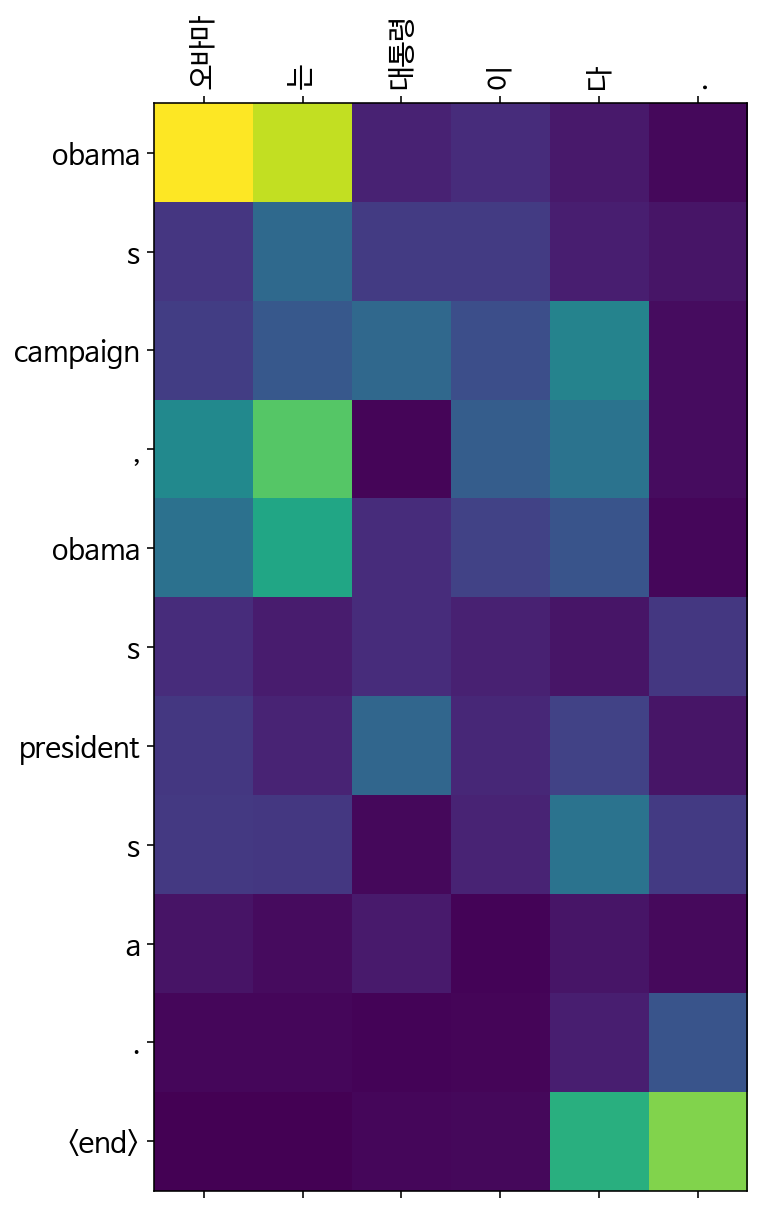

In [73]:
translate("오바마는 대통령이다.", encoder, decoder)

Input: ['시민', '들', '은', '도시', '속', '에', '산다', '.']
Predicted translation: the group also has been in the world . <end> 


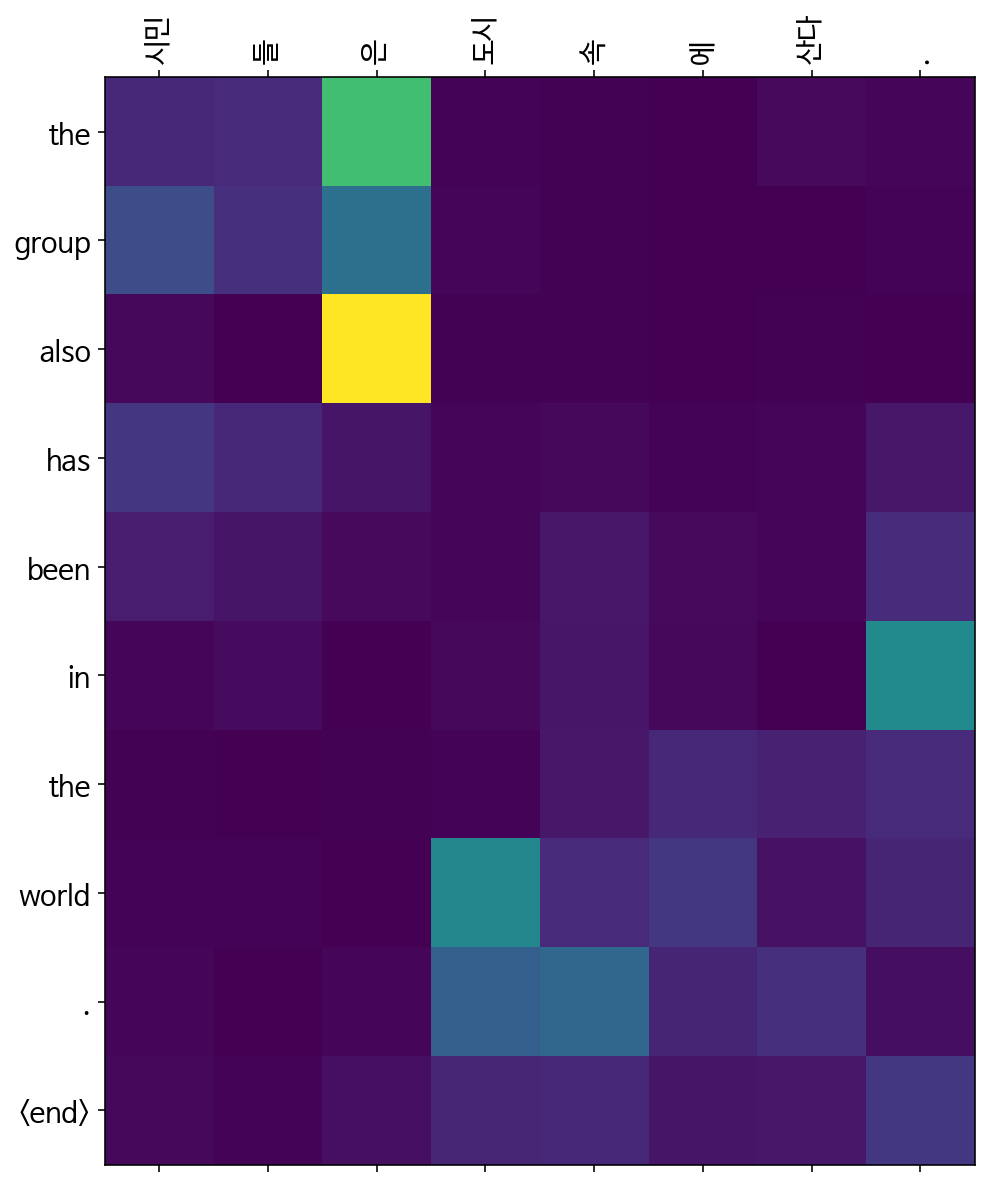

In [74]:
translate("시민들은 도시 속에 산다.", encoder, decoder)

Input: ['커피', '는', '필요', '없', '다', '.']
Predicted translation: it s not a battleship . <end> 


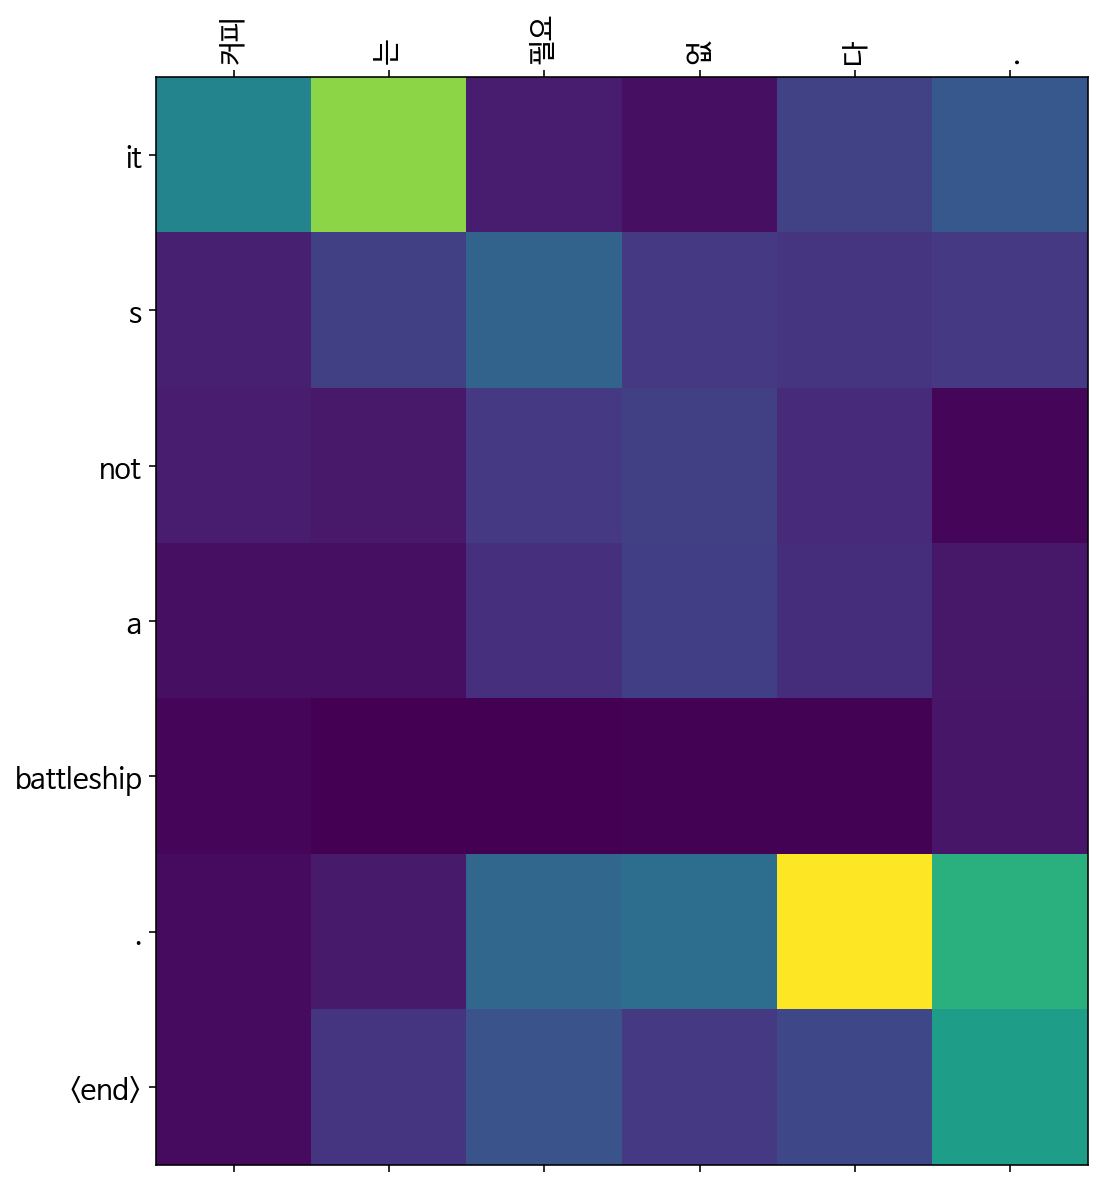

In [75]:
translate("커피는 필요 없다.", encoder, decoder)

Input: ['일곱', '명', '의', '사망자', '가', '발생', '했', '다', '.']
Predicted translation: seven people died in the death toll at least people died in the death toll at least people died in the death toll at least people died in the death toll at least people died in the death toll at least people died in the death toll at least people died in the death toll at least people died in the death toll at least people died in the death toll at least people died in the death toll at least people died in the 


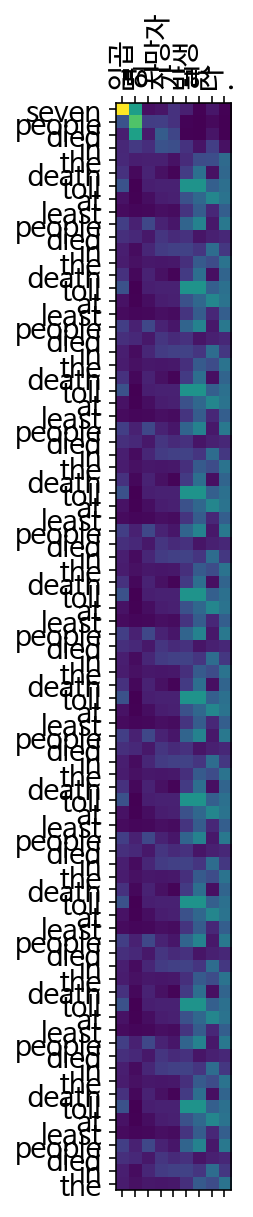

In [77]:
translate("일곱명의 사망자가 발생했다.", encoder, decoder)

# 회고

# 참고 자료

- https://hcnoh.github.io/2018-12-11-bahdanau-attention
- https://www.youtube.com/watch?v=AA621UofTUA&list=LL&index=2&t=762s
- https://www.youtube.com/watch?v=4DzKM0vgG1Y&list=LL&index=3
- https://www.youtube.com/watch?v=XxMhC11bD8o&list=LL&index=6
- https://www.tensorflow.org/tutorials/text/nmt_with_attention